C:\Users\solom\AppData\Local\Temp\ipykernel_30156\2362256378.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
C:\Users\solom\AppData\Local\Temp\ipykernel_30156\2362256378.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


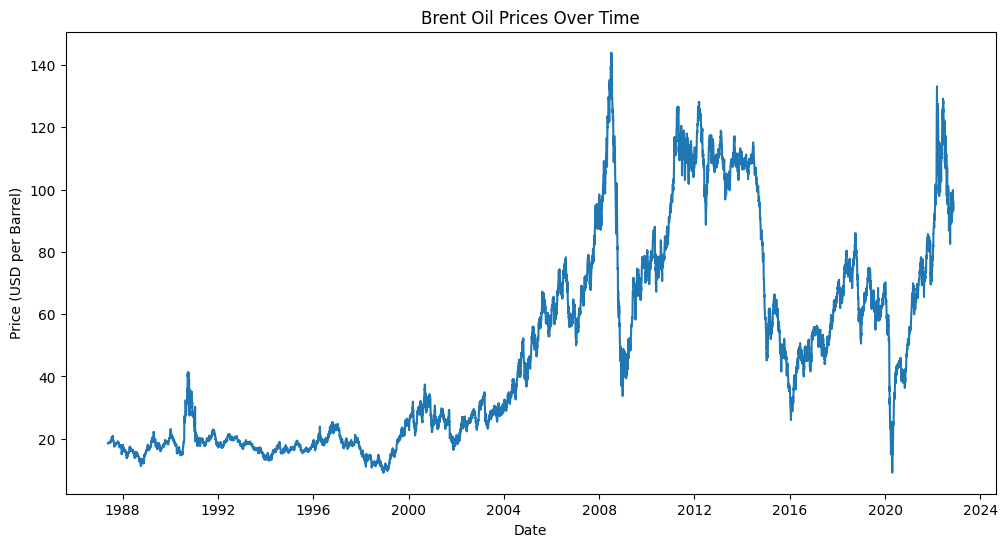

d:\Projects\SolomonProjects\Kifiya\week 10\week-10\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:                  Price   No. Observations:                 9011
Model:               MarkovRegression   Log Likelihood              -35281.967
Date:                Tue, 05 Nov 2024   AIC                          70575.934
Time:                        09:41:51   BIC                          70618.571
Sample:                             0   HQIC                         70590.441
                               - 9011                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0441      0.088    227.669      0.000      19.872      20.217
sigma2        26.3180      0.704     37.394      0.0

d:\Projects\SolomonProjects\Kifiya\week 10\week-10\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


In [ ]:
# task-2.ipynb

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import joblib

# Step 1: Load Brent Oil Prices Data
data_path = "../data/BrentOilPrices.csv"
df = pd.read_csv(data_path)
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.set_index('Date', inplace=True)

# Step 2: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Price')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.show()

# Step 3: Apply Markov-Switching ARIMA
# Fit Markov-Switching model on oil prices
ms_arima = MarkovRegression(df['Price'], k_regimes=2, trend='c', switching_variance=True)
ms_arima_fit = ms_arima.fit()
print(ms_arima_fit.summary())

# Save Markov-Switching ARIMA model
joblib.dump(ms_arima_fit, "../models/ms_arima_model.pkl")

# Step 4: LSTM Implementation
# Prepare data for LSTM
def prepare_lstm_data(series, n_lags):
    X, y = [], []
    for i in range(n_lags, len(series)):
        X.append(series[i-n_lags:i])
        y.append(series[i])
    return np.array(X), np.array(y)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Price'].values.reshape(-1, 1))
X, y = prepare_lstm_data(scaled_data, 10)

# Build LSTM model
model_lstm = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X, y, epochs=20, batch_size=32)

# Save LSTM model
model_lstm.save("../models/lstm_model.h5")

# Step 5: Hypothetical Discussion on Additional Factors
"""
Although we currently lack datasets for GDP, inflation, exchange rates, etc., these factors significantly impact oil prices:
- **GDP**: Higher economic growth often increases demand for oil.
- **Inflation**: Influences oil prices via monetary policy.
- **Exchange Rates**: Affects oil prices as oil is traded globally in USD.
- **Technological Changes**: Renewable energy developments can reduce oil demand.
- **Political Factors**: Geopolitical tensions and regulations directly affect supply and prices.

Future work could incorporate these using multivariate models like VAR when data is available.
"""

# Step 6: Model Validation
"""
Validate models using RMSE, MAE, and R-squared:
- Evaluate and compare the performance of Markov-Switching ARIMA and LSTM.
- Discuss their predictive power and robustness in capturing oil price movements.
"""
